## Ejercicio de vinos aplicado a redes neuronales

Importación de las librerías necesarias para la interpretación, comprensión y analisis de los datos <a name="librerias"></a>

In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Cargamos el archivo con la libreria de pandas, de esta forma crearemos un objeto DataFrame con todos los datos del documento.

A continuación sacaremos la información de la tabla. 

In [118]:
wine = pd.read_csv("winequality-red.csv")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# MAPA DE CALOR

Text(0, 0.5, 'Color bar')

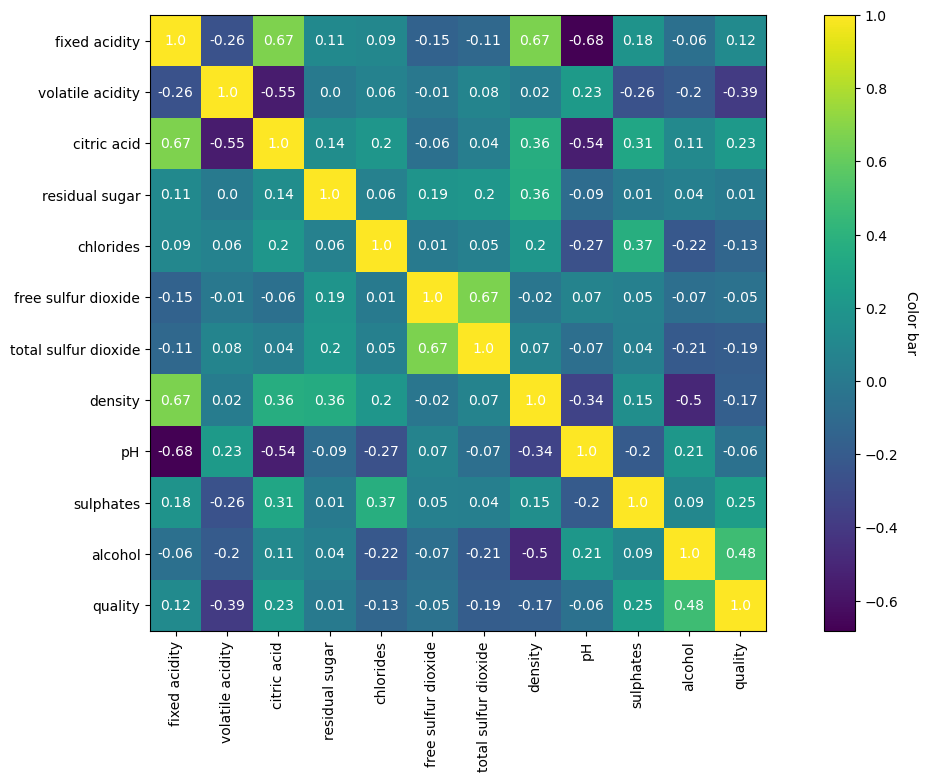

In [119]:
import numpy as np
import matplotlib.pyplot as plt

corr_matrix = wine.corr()

# Etiquetas
xlabs = corr_matrix.columns
ylabs = corr_matrix.index
         
# Mapa de calor
fig, ax = plt.subplots(figsize=(15,8))
im = ax.imshow(corr_matrix)

# Agregar las etiquetas
ax.set_xticks(np.arange(len(xlabs)), labels = xlabs)
ax.set_yticks(np.arange(len(ylabs)), labels = ylabs)

# Agregar los valores a cada celda
for i in range(len(xlabs)):
    for j in range(len(ylabs)):
        text = ax.text(j, i, round(corr_matrix.iloc[i, j], 2),
                       ha = "center", va = "center", color = "w")
        
# Agregar la leyenda
# cbar = fig.colorbar(im, ax=ax, label="corr")
# cbar.outline.set_visible(False)
cbar = ax.figure.colorbar(im, ax = ax)
ax.set_xticklabels(xlabs,rotation=90)
cbar.ax.set_ylabel("Color bar", rotation = -90, va = "bottom")

### Eliminacion de outliers

In [120]:
columnas = wine.columns.drop(["residual sugar"])
columnas

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [121]:
#Para esto primero analizar los scatters para ver cuales tienen outliers y aplicarlo a esas columnas

# Seleccionamos las clumnas que vamos a usar para el entrenamiento
columnas = wine.columns.drop(["residual sugar"])
# columnas = ["alcohol", "sulphates", "citric acid", "volatile acidity","quality"]
wine_filtrado =  wine.copy()

for col in columnas:
    #Pintar procesamiento de las columnas
    if col != 'quality':
        print(f"Procesando columna {col}, registros actuales: {len(wine_filtrado[col])}")
        q_low = wine_filtrado[col].quantile(0.01)
        q_hi  = wine_filtrado[col].quantile(0.99)

        wine_filtrado = wine_filtrado[(wine_filtrado[col] < q_hi) & (wine_filtrado[col] > q_low)]
for col in columnas:
    print(f"Columna {col}, registros procesados: {len(wine_filtrado[col])}")

Procesando columna fixed acidity, registros actuales: 1599
Procesando columna volatile acidity, registros actuales: 1563
Procesando columna citric acid, registros actuales: 1529
Procesando columna chlorides, registros actuales: 1391
Procesando columna free sulfur dioxide, registros actuales: 1363
Procesando columna total sulfur dioxide, registros actuales: 1305
Procesando columna density, registros actuales: 1262
Procesando columna pH, registros actuales: 1236
Procesando columna sulphates, registros actuales: 1206
Procesando columna alcohol, registros actuales: 1175
Columna fixed acidity, registros procesados: 1134
Columna volatile acidity, registros procesados: 1134
Columna citric acid, registros procesados: 1134
Columna chlorides, registros procesados: 1134
Columna free sulfur dioxide, registros procesados: 1134
Columna total sulfur dioxide, registros procesados: 1134
Columna density, registros procesados: 1134
Columna pH, registros procesados: 1134
Columna sulphates, registros proce

### Division de los datos para el entrenamiento del modelo

In [122]:
wine_filtrado.columns.drop("quality")

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [123]:
# Utilizando ya un sistema de entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder




y = wine_filtrado["quality"].copy()
le = LabelEncoder()
y = le.fit_transform(y)

# x = wine_filtrado[["alcohol", "sulphates", "citric acid", "volatile acidity"]]
cols = wine_filtrado.columns.drop(["quality"])
x = wine_filtrado[cols]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

from sklearn.discriminant_analysis import StandardScaler

ss = StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Creacion de la red neuronal

Imports

In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [129]:
from keras.utils import to_categorical

dimension_entrada = x_train.shape[1]
col_data = np.unique(y)

model = keras.models.Sequential()
model.add(Dense(30, input_dim=dimension_entrada, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="relu"))

model.add(keras.layers.Dense(len(col_data), activation="softmax"))

sgd = SGD(learning_rate=0.003)
# model.compile(loss="sparse_categorical_crossentropy",optimizer=sgd ,metrics=["accuracy"])

# se pueden poner las y en forma de one_hot_encoder

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# y_valid = to_categorical(y_valid)
model.compile(loss="categorical_crossentropy",  optimizer="sgd",   metrics=["accuracy"])

model.summary()

c:\Users\oscar.torresrodrigue\AppData\Local\miniconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 30)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,256 (4.91 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento

In [130]:
epochs = 1000

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
# Nota: Se deberia tener unos datos apartados para validacion, como no tenemos datos suficiente utilizamos los de test
history = model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test, y_test),callbacks=[early_stopping_cb])

Epoch 1/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1010 - loss: 1.9102 - val_accuracy: 0.2907 - val_loss: 1.6492
Epoch 2/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3075 - loss: 1.6269 - val_accuracy: 0.3612 - val_loss: 1.4589
Epoch 3/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3700 - loss: 1.4718 - val_accuracy: 0.4273 - val_loss: 1.3298
Epoch 4/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3918 - loss: 1.3634 - val_accuracy: 0.4537 - val_loss: 1.2411
Epoch 5/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4558 - loss: 1.2617 - val_accuracy: 0.4802 - val_loss: 1.1864
Epoch 6/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4533 - loss: 1.2237 - val_accuracy: 0.4846 - val_loss: 1.1480
Epoch 7/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4567 - loss: 1.1870 - val_accuracy: 0.4978 - val_loss: 1.1189
Epoch 8/1000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4472 - loss: 1.2243 - val_accuracy: 0.

<Axes: >

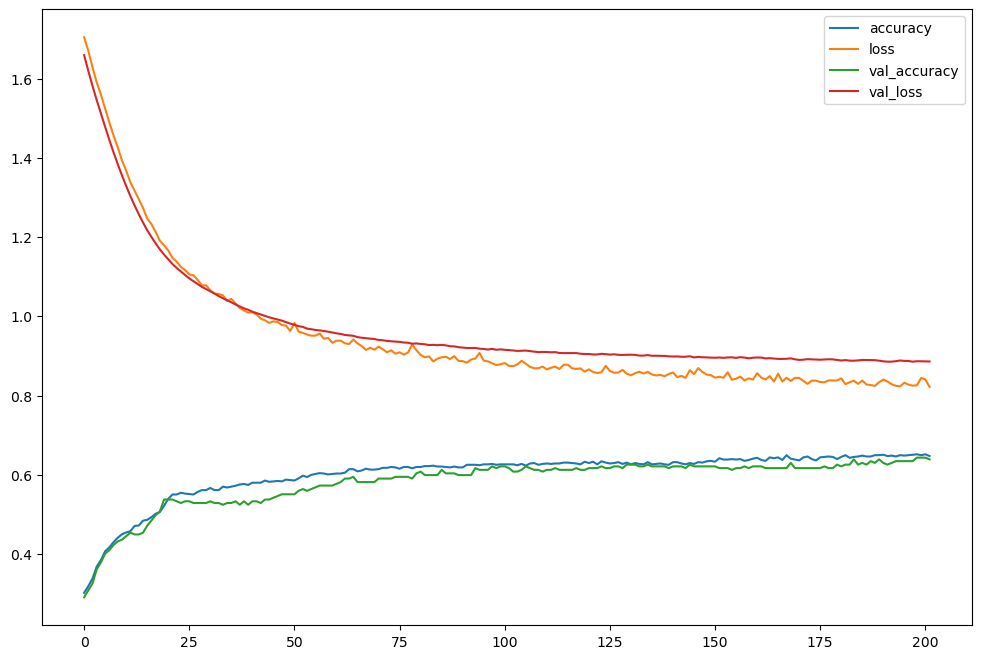

In [127]:
pd.DataFrame(history.history).plot(figsize=(12,8))

In [131]:
model.evaluate(x_test,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.6213 - loss: 0.9232  


[0.8936617970466614, 0.6299559473991394]